<a href="https://colab.research.google.com/github/MassielC/portfolio/blob/main/parkinsons_classification_and_medical_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Exercises: Classification and Regression**

---

## **Introduction**

This project consists of two distinct machine learning tasks, focusing on **binary classification** and **regression** problems. The objective is to apply supervised learning techniques to analyze two datasets and address specific real-world challenges.  

### **Part 1: Binary Classification**  
In the first part of this project, we tackle a **binary classification problem** using the [Parkinson Disease Detection dataset](https://www.kaggle.com/datasets/jainaru/parkinson-disease-detection/data) from Kaggle. The dataset contains features derived from voice recordings, capturing characteristics such as pitch, amplitude, and noise. These features are used to differentiate between healthy individuals and those with Parkinson’s Disease.  

The goal of this task is to:  
1. Build and evaluate a classification model to discriminate between the two groups.  
2. Explore the importance of voice-related features in detecting Parkinson’s Disease.  


### **Part 2: Regression**  
The second part addresses a **regression problem** using the [Medical Cost dataset](https://www.kaggle.com/datasets/mirichoi0218/insurance) from Kaggle. This dataset includes demographic, lifestyle, and health-related features such as age, BMI, smoking status, and region, along with the target variable: **healthcare insurance costs**.  

The aim of this task is to:  
1. Build a regression model to predict healthcare costs for patients in the US.  
2. Analyze the contribution of different features, such as age and smoking habits, to the overall cost.  

---

### **Overall Objective**  
Through these tasks, this project provides hands-on experience with machine learning workflows for both classification and regression, including data preprocessing, model development, performance evaluation, and interpretation of results.  

---

## **1. Classification**


### Context


Parkinson's Disease (PD) is a degenerative neurological disorder marked by decreased dopamine levels in the brain. It manifests itself through a deterioration of movement, including the presence of tremors and stiffness. There is commonly a marked effect on speech, including dysarthria (difficulty articulating sounds), hypophonia (lowered volume), and monotone (reduced pitch range). Additionally, cognitive impairments and changes in mood can occur, and risk of dementia is increased.

Traditional diagnosis of Parkinson’s Disease involves a clinician taking a neurological history of the patient and observing motor skills in various situations. Since there is no definitive laboratory test to diagnose PD, diagnosis is often difficult, particularly in the early stages when motor effects are not yet severe. Monitoring progression of the disease over time requires repeated clinic visits by the patient. An effective screening process, particularly one that doesn’t require a clinic visit, would be beneficial. Since PD patients exhibit characteristic vocal features, voice recordings are a useful and non-invasive tool for diagnosis. If machine learning algorithms could be applied to a voice recording dataset to accurately diagnosis PD, this would be an effective screening step prior to an appointment with a clinician.



### Data


This dataset is composed of a range of biomedical voice measurements from 31 people, 23 with Parkinson's disease (PD). Each column in the table is a particular voice measure, and each row corresponds to one of 195 voice recordings from these individuals ("name" column). The main aim of the data is to discriminate healthy people from those with PD, according to the "status" column which is set to 0 for healthy and 1 for PD.

### Imports

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data dictionary




- name - ASCII subject name and recording number
- MDVP:Fo(Hz) - Average vocal fundamental frequency
- MDVP:Fhi(Hz) - Maximum vocal fundamental frequency
- MDVP:Flo(Hz) - Minimum vocal fundamental frequency
- MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP - Several
measures of variation in fundamental frequency
- MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA - Several measures of variation in amplitude
- NHR,HNR - Two measures of ratio of noise to tonal components in the voice
- **status** - Health status of the subject (one) - Parkinson's, (zero) - healthy
- RPDE,D2 - Two nonlinear dynamical complexity measures
- DFA - Signal fractal scaling exponent
- spread1,spread2,PPE - Three nonlinear measures of fundamental frequency variation'

### Step 1: Load the data, explore the dataset, and create a feature matrix and a target array. 0.5 marks.

In [ ]:
# The downloaded file PD.csv contains data in a CSV (comma-separated values) formatted text file.

# Load the dataset using pandas
df = pd.read_csv('PD.csv')

# Display the first few rows
df.head()


,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
# Explore the dataset

# Check for missing values (hint: check out isnull() or df.info() in pandas)
print("First way to find missing values: \n", df.isnull().sum(), "\n")

print("Second way to find missing values: \n")
df.info()
# Impute missing values if you find any (you can adapt your code from Assignment1 to do so)
# Answer: No missing data

First way to find missing values: 
 name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64 

Second way to find missing values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float

In [ ]:
# The 'name' is not necessary - exclude it from the dataframe (hint: remember the drop() method in pandas)
df.drop('name', axis=1, inplace=True)

In [ ]:
# Create feature matrix and target array
X = df.drop(df.columns[16], axis=1)
y = df.iloc[:,16]  # The target array is the 'status' column

y.info()

<class 'pandas.core.series.Series'>
RangeIndex: 195 entries, 0 to 194
Series name: status
Non-Null Count  Dtype
--------------  -----
195 non-null    int64
dtypes: int64(1)
memory usage: 1.6 KB


### Step 2: Create training and test sets and scale data. 0.5 marks.

In [ ]:
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Note that we are not standardizing the whole dataset, but we are fitting the scaler on the training set, then applying it to the training and test set. This is to avoid data leakage.

In [ ]:
# Standardize data
# Complete the code below

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler on the training set
X_train = scaler.transform(X_train)   # Transform the training set
X_test = scaler.transform(X_test)  # Apply the scaler transformation on the test set

### Step 3: Train the first model, then evaluate the performance using at least accuracy, sensitivity (a.k.a. recall on class = 1) and specificity (a.k.a. recall for class 0). Also, display the confusion matrix with Matplotlib or Seaborn. Any other visualizations of the model are optional. 1 mark.


Accuracy: 0.8974358974358975
Sensitivity: 1.0
Specificity: 0.42857142857142855


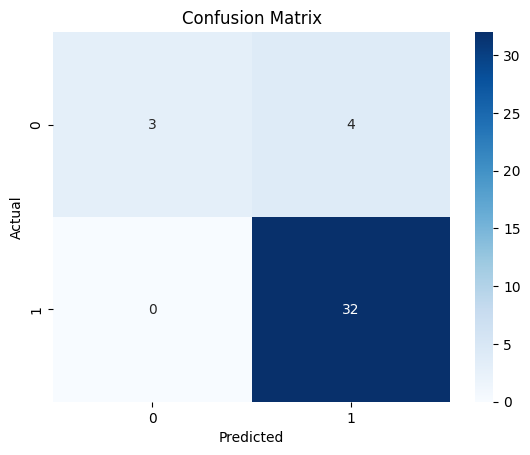

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score
import seaborn as sns
# Train the first model
model= LogisticRegression()
model.fit(X_train, y_train)

y_pred= model.predict(X_test)

#, then evaluate the performance using at least: accuracy,
# sensitivity (a.k.a. recall on class = 1) and specificity (a.k.a. recall for class = 0).
accuracy = accuracy_score(y_test, y_pred)
sensitivity = recall_score(y_test, y_pred, pos_label=1)
specificity = recall_score(y_test, y_pred, pos_label=0)
print("Accuracy:", accuracy)
print("Sensitivity:", sensitivity)
print("Specificity:", specificity)

conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()
# Also, display the confusion matrix with Matplotlib or Seaborn.

### Step 4: Repeat step 3 for the second model. 1 mark.

In [ ]:
# Train the second model, then evaluate the performance using at least: accuracy,
# sensitivity (a.k.a. recall on class = 1) and specificity (a.k.a. recall for class = 0).
# Also, display the confusion matrix with Matplotlib or Seaborn.


Accuracy (Random Forest): 0.9487179487179487
Sensitivity (Random Forest): 1.0
Specificity (Random Forest): 0.7142857142857143


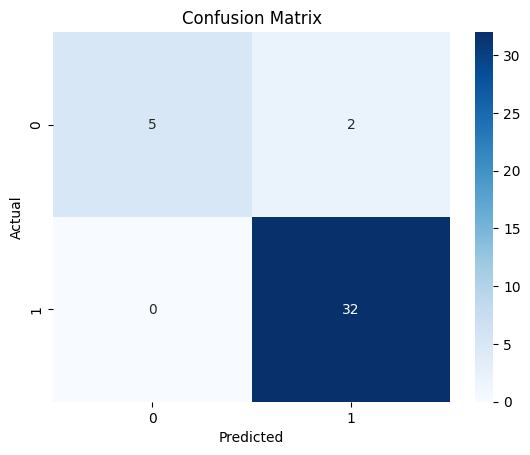

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train the second model
model2 = RandomForestClassifier(n_estimators=100, random_state=42)
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

# Evaluate the performance
accuracy2 = accuracy_score(y_test, y_pred2)
sensitivity2 = recall_score(y_test, y_pred2, pos_label=1)
specificity2 = recall_score(y_test, y_pred2, pos_label=0)

print("Accuracy (Random Forest):", accuracy2)
print("Sensitivity (Random Forest):", sensitivity2)
print("Specificity (Random Forest):", specificity2)

# confusion matrix
conf_matrix2 = confusion_matrix(y_test, y_pred2)
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Step 5: Repeat step 3 for the third model. 1 mark.

In [ ]:
# Train the third model, then evaluate the performance using at least: accuracy,
# sensitivity (a.k.a. recall on class = 1) and specificity (a.k.a. recall for class = 0).
# Also, display the confusion matrix with Matplotlib or Seaborn.

Accuracy (SVM): 0.8717948717948718
Sensitivity (SVM): 0.9375
Specificity (SVM): 0.5714285714285714


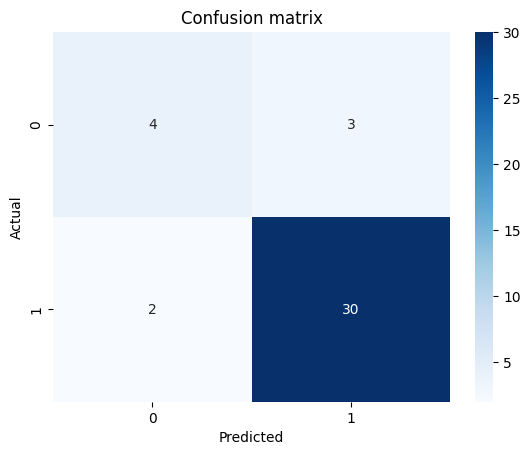

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

# Train the third model (SVM)
model3 = SVC(kernel='linear', random_state=42)
model3.fit(X_train, y_train)

y_pred3 = model3.predict(X_test)

# Evaluate the performance
accuracy3 = accuracy_score(y_test, y_pred3)
sensitivity3 = recall_score(y_test, y_pred3, pos_label=1)
specificity3 = recall_score(y_test, y_pred3, pos_label=0)

print("Accuracy (SVM):", accuracy3)
print("Sensitivity (SVM):", sensitivity3)
print("Specificity (SVM):", specificity3)

conf_matrix3 = confusion_matrix(y_test, y_pred3)
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


### Step 6: Provide a brief discussion on why you selected particular models, how the performance varied between models, which model you believe is the most generalizable, and any issues or problems you encountered (200 words max). 1 mark.

The models selected (Logistic Regression, Random Forest, and SVM) offer a balance of interpretability, non-linearity handling, and flexibility.
I chose Logistic Regression for its simplicity and interpretability in binary classification. Random Forest was included for its ability to handle complex data interactions through ensembling. SVM was selected for its robust performance in high-dimensional spaces.

- Random Forest had the best overall performance, with an accuracy of 94.87%, perfect sensitivity (1.0), and the highest specificity (0.71). This model captured both positive and negative classes well, indicating its generalization ability.
- Logistic Regression had good accuracy (89.74%) and perfect sensitivity (1.0) but struggled with specificity (0.43), indicating difficulty in predicting true negatives.
- SVM showed strong performance in sensitivity (0.94) but lower specificity (0.57) compared to Random Forest.
Generalization

Based on these results, Random Forest is likely the most generalizable due to its higher specificity and accuracy. It balances predicting both classes effectively, reducing the risk of overfitting.

## **2. Regression**

### Content

This public dataset was cleaned to match the format presented in the book "Machine Learning with R" by Brett Lantz. The dataset is available on GitHub [here](https://github.com/stedy/Machine-Learning-with-R-datasets).

### Imports

In [ ]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

### Data Dictionary


- `age`: age of primary beneficiary - numerical

- `sex`: insurance contractor gender: female/male - categorical

- `bmi`: Body mass index - numerical

- `children`: Number of children covered by health insurance / Number of dependents - numerical

- `smoker`: yes/no - categorical

- `region`: the beneficiary's residential area in the US: northeast, southeast, southwest, northwest - categorical

- `charges`: Individual medical costs billed by health insurance - numerical



### Step 1: Load the data, explore the dataset, and create a feature matrix and a target array. 0.5 marks.

In [ ]:
# The downloaded file insurance.csv contains data in a CSV (comma-separated values) formatted text file.
import pandas as pd
# Load the dataset using pandas
df = pd.read_csv("insurance.csv")  # your code here

# Display the first few rows
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Explore the dataset
print("To find missing values: \n", df.isnull().sum(), "\n")

print("To find 0 values: \n", (df == 0).sum(), "\n")

print("Second way to find missing values: \n")
df.info()
# Check for missing values (hint: check out isnull() or df.info() in pandas)
# Note that the missing values could be 0 or NaN - pay attention to this
# your code here

To find missing values: 
 age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64 

To find 0 values: 
 age           0
sex           0
bmi           0
children    574
smoker        0
region        0
charges       0
dtype: int64 

Second way to find missing values: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# Remove samples containing missing values if you find any
# ANSWER: No missing values

Let's convert the categorical variables (yes/no, female/male, etc.) into numerical variables. Have a look at pandas `replace()` or `get_dummies()` methods. Hint: use `dtype=int` in `get_dummies()`. [Here](https://www.geeksforgeeks.org/how-to-convert-categorical-variable-to-numeric-in-pandas/) is an example.

In [ ]:
# Convert categorical to numeric

# Convert yes/no variables with 'replace()'
df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})
df['sex'] = df['sex'].replace({'female': 1, 'male': 0})

# Convert 'region' column with 'get_dummies()'
dummies = pd.get_dummies(df['region'], dtype=int) # Get the dummy columns
merged = pd.concat([df, dummies], axis=1) # Concatenate dummy columns with dataframe
df = merged.drop(['region', 'northwest'], axis=1)  # Drop the 'region' column and one of the dummies from 'merged' to avoid redundancy

df.head()

<ipython-input-25-5ca8bbc58730>:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['smoker'] = df['smoker'].replace({'yes': 1, 'no': 0})
<ipython-input-25-5ca8bbc58730>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['sex'] = df['sex'].replace({'female': 1, 'male': 0})


,age,sex,bmi,children,smoker,charges,northeast,southeast,southwest
0,19,1,27.900,0,1,16884.92400,0,0,1
1,18,0,33.770,1,0,1725.55230,0,1,0
2,28,0,33.000,3,0,4449.46200,0,1,0
3,33,0,22.705,0,0,21984.47061,0,0,0
4,32,0,28.880,0,0,3866.85520,0,0,0


In [ ]:
# Create feature matrix and target array
X = df.drop(df.columns[5], axis=1) # The feature matrix is all columns except 'charges'
y = df.iloc[:,5]  # The target array is the 'charges' column

X.head()

,age,sex,bmi,children,smoker,northeast,southeast,southwest
0,19,1,27.900,0,1,0,0,1
1,18,0,33.770,1,0,0,1,0
2,28,0,33.000,3,0,0,1,0
3,33,0,22.705,0,0,0,0,0
4,32,0,28.880,0,0,0,0,0


### Step 2: Create training and test sets and scale data. 0.5 marks.

In [ ]:
# Create training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Standardize data
# Complete the code below

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)  # Fit the scaler on the training set
X_train = scaler.transform(X_train)  # Transform the training set
X_test = scaler.transform(X_test)  # Apply the scaler transformation on the test set

### Step 3: Implement Linear Ridge Regression and evaluate performance. 1 mark

In [ ]:
# Linear Ridge Regression
# Replace 'None' with your code

# Imports
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt
import numpy as np

# Grid for hyperparameter alpha
parameters = {"alpha": np.logspace(-3,3,7)}

# Create ridge model
model = Ridge()

# Perform grid search on the training set
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Remember optimised model
model_lin = grid_search.best_estimator_

# Calculate r2 and RMSE on the test set
y_pred = model_lin.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("R-squared:", r2)
print("RMSE:", rmse)

R-squared: 0.7830404225618796
RMSE: 5803.67979666861


### Step 4: Implement Polynomial Ridge Regression and evaluate performance. 1 mark.

In [ ]:
# Polynomial Ridge Regression
# Replace 'None' with your code

# Imports
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

# Create model with Pipeline
model = Pipeline((
("poly_features", PolynomialFeatures(include_bias=False)),
("scaler", StandardScaler()),
("ridge", Ridge())))

# Define parameter grid
parameters = {"poly_features__degree": [1, 2, 3],
             "ridge__alpha": [0.1, 1, 10, 100]}

# Perform grid search on the training set
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Remember optimised model
model_poly = grid_search.best_estimator_
# Calculate r2 and RMSE on the test set
y_pred = model_poly.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))
print("R-squared:", r2)
print("RMSE:", rmse)

R-squared: 0.8665670089162533
RMSE: 4551.406662220461


### Step 5: Implement Kernel Ridge Regression and evaluate performance. 1 mark.

In [ ]:
# Kernel Ridge Regression
# Replace 'None' with your code

# Imports
from sklearn.kernel_ridge import KernelRidge
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error
from math import sqrt

# Create Kernel Ridge model with RBF kernel
model = KernelRidge(kernel="rbf")

# Define parameter grid
parameters = {
    "alpha": [0.01, 0.1, 1, 10],  # Regularization strength
    "gamma": [0.001, 0.01, 0.1, 1]  # Kernel coefficient for RBF
}

# Perform grid search on the training set
grid_search = GridSearchCV(model, parameters, cv=5)
grid_search.fit(X_train, y_train)

# Remember optimized model
model_kernel = grid_search.best_estimator_

# Calculate r2 and RMSE on the test set
y_pred = model_kernel.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = sqrt(mean_squared_error(y_test, y_pred))

print("R-squared:", r2)
print("RMSE:", rmse)


R-squared: 0.8671374064078445
RMSE: 4541.668098605311


### Step 6: Plot expected targets of the test set on the x axis and predicted targets on the y axis and overlay with the line `y_test = y_pred`. You can follow the example in the notebook dedicated to nonlinear regression. 0.5 marks

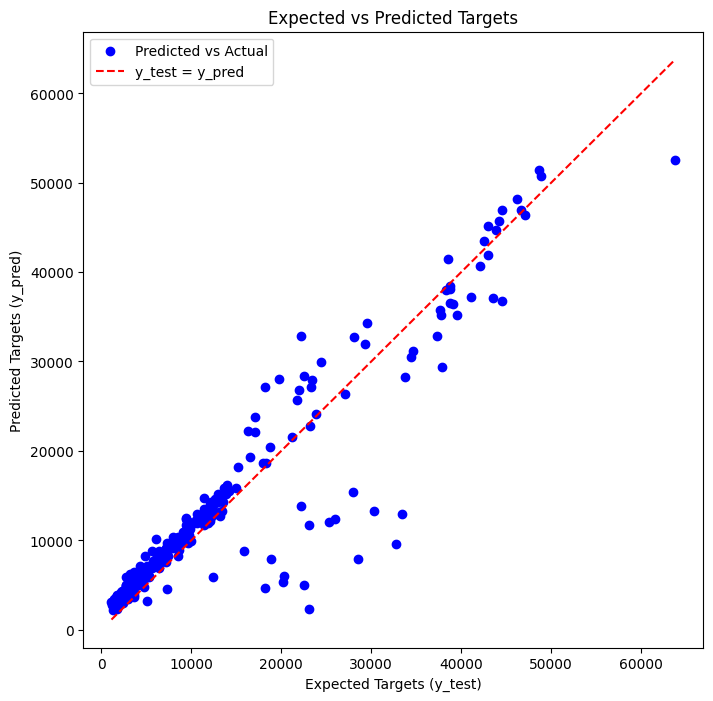

In [ ]:
# Plot targets

# Imports
from matplotlib.pyplot import subplot

import matplotlib.pyplot as plt
import numpy as np

# Scatter plot: Expected targets (y_test) vs. Predicted targets (y_pred)
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')

# Overlay with the line y_test = y_pred
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='y_test = y_pred')

# Add labels and title
plt.xlabel('Expected Targets (y_test)')
plt.ylabel('Predicted Targets (y_pred)')
plt.title('Expected vs Predicted Targets')
plt.legend()

# Show plot
plt.show()


### Step 7: Discuss the performance of the models and any issues or problems you encountered (200 words max). 0.5 marks.

The three model (Kernel Ridge, Polynomial Ridge, and Linear Ridge) were evaluated for predicting insurance costs using R-squared and RMSE. Kernel Ridge performed best (R-squared: 0.8671, RMSE: 4541.67), followed closely by Polynomial Ridge (R-squared: 0.8665, RMSE: 4551.41). Linear Ridge performed the worst (R-squared: 0.783, RMSE: 5803.68), as expected, since it only captures linear relationships. For R-squared, the closer to 1 the better. For RMSE the smaller the better.

The superior performance of Kernel and Polynomial Ridge models highlights the importance of capturing non-linear relationships, which are likely present in features like age, BMI, and smoker status. However, Polynomial Ridge may introduce noise and risk of overfitting, while Kernel methods, although powerful, can lack interpretability.

I didn't encountered issues, but a concern include potential overfitting with Polynomial Ridge, the complexity of Kernel methods, and balancing the bias-variance tradeoff.

I think improvements can be made by feature engineering and applying cross-validation will also help prevent overfitting.

